In [1]:
%matplotlib inline

In [2]:
import re
import json
import getpass
import requests
import numpy as np
import pandas as pd
import urllib2, base64
from urlparse import urljoin
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 

In [3]:
path = "D:/Projects/Python/MS-BGD2015/Amine_Salem/health_hackathon/Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2013.xls"
data = pd.read_excel(path, sheetname=[1, 2, 3, 4, 5, 6])
df = data[2]
df = df.replace("nc", np.nan).dropna()
df.head(5)

c:\users\mohamed amine\anaconda\lib\site-packages\pandas\core\common.py:516: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,SPECIALISTES,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS (euros),FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4329488,1879396,0,6208884,27995,67
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,4615160,191421,119,4806700,8150,23
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,4872085,416466,0,5288551,9479,43
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,105,21618434,9266410,0,30884844,110114,84
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,21,5212563,682624,9,5895196,12231,55


In [4]:
df.describe()

,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS (euros),FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
count,3297.000000,3.297000e+03,3.297000e+03,3297.000000,3.297000e+03,3297.000000,3297.000000
mean,175.684865,3.235364e+07,8.027083e+06,24349.723992,4.040507e+07,170483.340613,30.987868
std,2319.945496,4.107131e+08,9.856601e+07,668589.365426,4.902041e+08,2098850.601205,63.768795
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,16.000000,2.944123e+06,1.264380e+05,0.000000,3.509843e+06,8509.000000,13.000000
75%,49.000000,9.907186e+06,1.633396e+06,6.000000,1.186814e+07,50669.000000,27.000000
max,114020.000000,1.955612e+10,4.089269e+09,38086256.000000,2.231393e+10,91261139.000000,707.000000


In [5]:
df = df[df['DEPARTEMENT'].str.contains('- ')]
df = df[df['SPECIALISTES'].str.contains('- ')]
pd.DataFrame(df.count(), columns=[''])

,
SPECIALISTES,2391
DEPARTEMENT,2391
EFFECTIFS,2391
HONORAIRES SANS DEPASSEMENT (euros),2391
DEPASSEMENTS (euros),2391
FRAIS DE DEPLACEMENTS (euros),2391
HONORAIRES TOTAUX (euros),2391
NOMBRE DE DEPASSEMENTS,2391
DEPASSEMENT MOYEN (euros),2391


In [6]:
df['num_spe'] = df['SPECIALISTES'].str.split('-').apply(lambda x: x[0]).astype('float')
df['num_dep'] = df['DEPARTEMENT'].str.split('-').apply(lambda x: x[0]).replace('2B', '100').replace('2A', '101').astype('float')
df.head(5)

,SPECIALISTES,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (euros),DEPASSEMENTS (euros),FRAIS DE DEPLACEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros),num_spe,num_dep
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4329488,1879396,0,6208884,27995,67,2,1
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,4615160,191421,119,4806700,8150,23,2,2
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,4872085,416466,0,5288551,9479,43,2,3
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,105,21618434,9266410,0,30884844,110114,84,2,6
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,21,5212563,682624,9,5895196,12231,55,2,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BDF2B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000ED02908>]], dtype=object)

c:\users\mohamed amine\anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


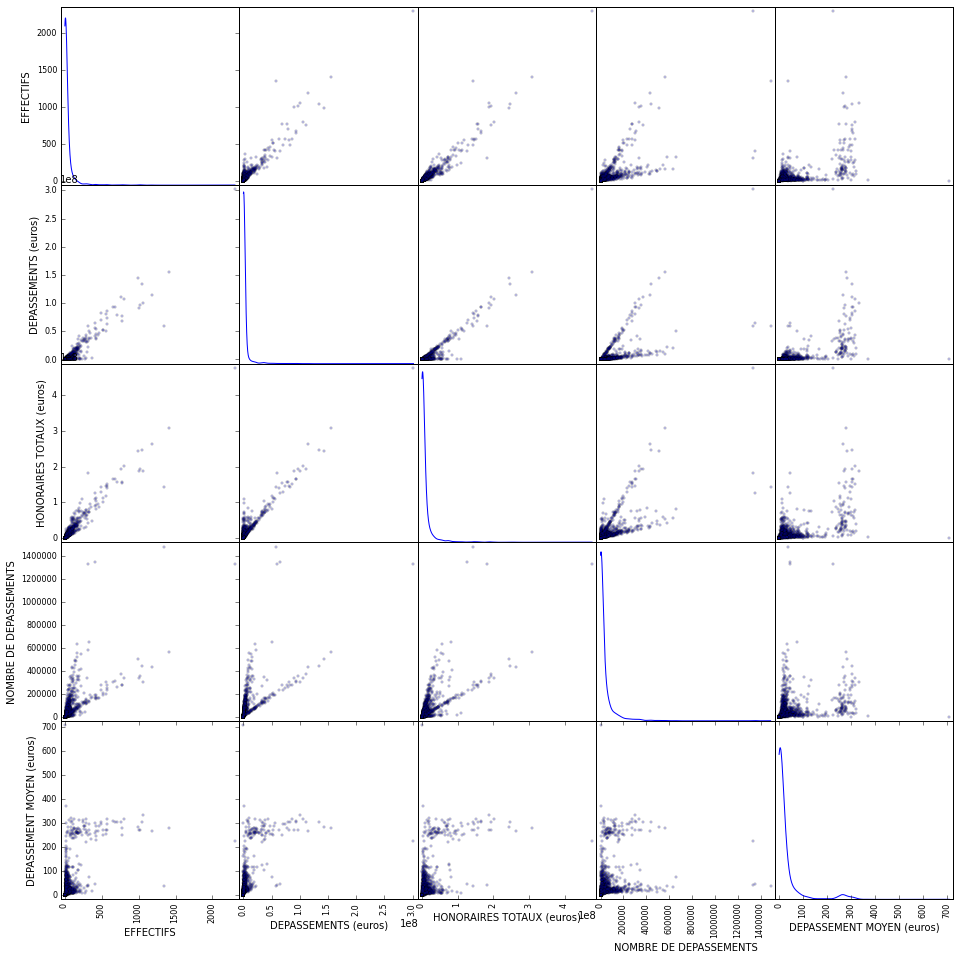

In [7]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[['EFFECTIFS','DEPASSEMENTS (euros)','HONORAIRES TOTAUX (euros)',
                   'NOMBRE DE DEPASSEMENTS','DEPASSEMENT MOYEN (euros)']], 
               alpha=0.2, figsize=(16, 16), diagonal='kde')

D'après ce graphique, on peut avoir l'impression que le nombre de medecins (effectif) est corrélé avec le nombre de dépassements et les dépassements d'honoraires en euros

Idée à creuser

In [8]:
data = df[['EFFECTIFS','DEPASSEMENTS (euros)','HONORAIRES TOTAUX (euros)',
                   'NOMBRE DE DEPASSEMENTS','DEPASSEMENT MOYEN (euros)','num_spe']]
#.groupby(df['num_dep'], sort=False))

data = data.sort('num_spe')
pd.DataFrame(data.dtypes, columns=['type'])

,type
EFFECTIFS,float64
DEPASSEMENTS (euros),float64
HONORAIRES TOTAUX (euros),float64
NOMBRE DE DEPASSEMENTS,float64
DEPASSEMENT MOYEN (euros),float64
num_spe,float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC25C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002308E860>]], dtype=object)

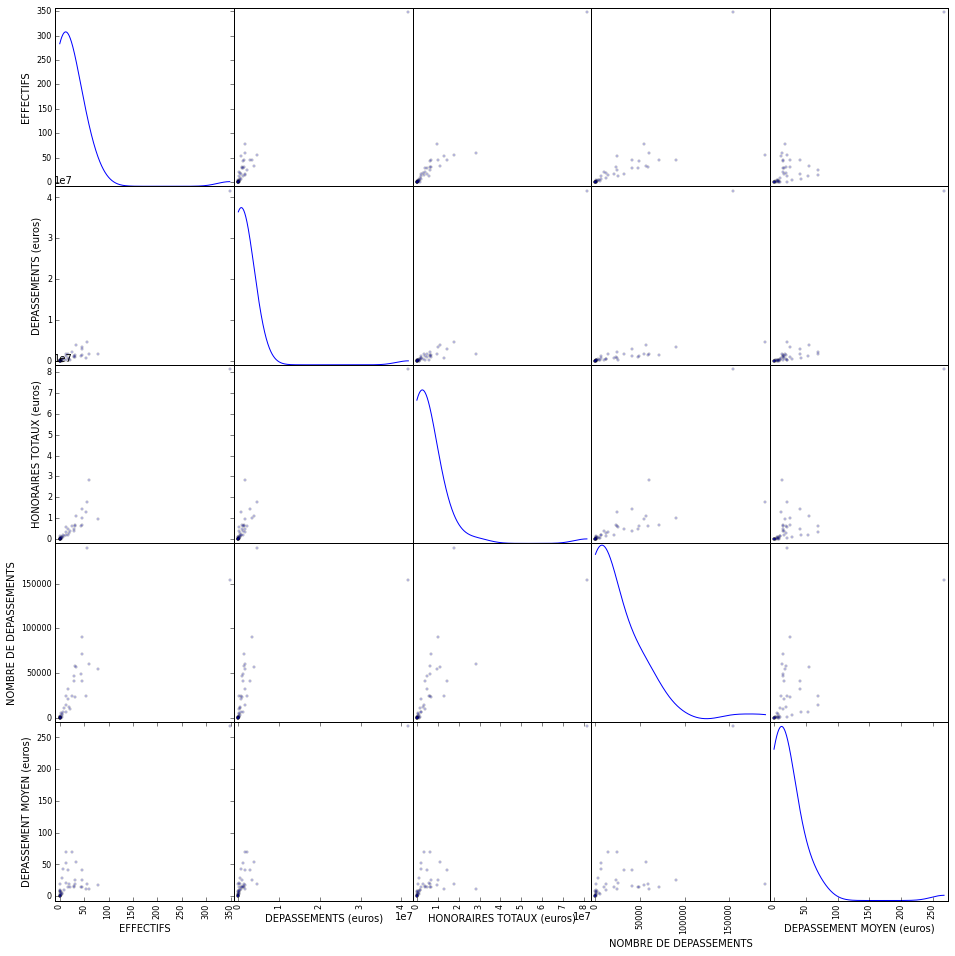

In [9]:
dep_groups = data.groupby('num_spe').mean()

scatter_matrix(dep_groups, 
               alpha=0.2, figsize=(16, 16), diagonal='kde')

In [10]:
dep_groups.head(500)

,EFFECTIFS,DEPASSEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
num_spe,,,,,
2,44.842105,2801398.671053,14521541.236842,40692.144737,41.078947
3,53.464286,546136.595238,12888899.880952,23775.214286,11.535714
4,25.125000,2126233.645833,6399483.583333,24267.166667,69.375000
5,45.353846,1447987.338462,6924344.492308,71185.076923,14.061538
6,59.269663,1576574.067416,28457206.943820,59684.977528,11.853933
7,45.720000,3246997.186667,10276486.600000,90569.493333,25.306667
8,31.593220,911969.898305,6831718.508475,22958.847458,25.118644
9,3.750000,190045.825000,462333.150000,4156.625000,5.875000
10,0.666667,94023.185185,204611.777778,618.222222,6.185185


In [11]:
pd.DataFrame(dep_groups.dtypes, columns=['type'])

,type
EFFECTIFS,float64
DEPASSEMENTS (euros),float64
HONORAIRES TOTAUX (euros),float64
NOMBRE DE DEPASSEMENTS,float64
DEPASSEMENT MOYEN (euros),float64


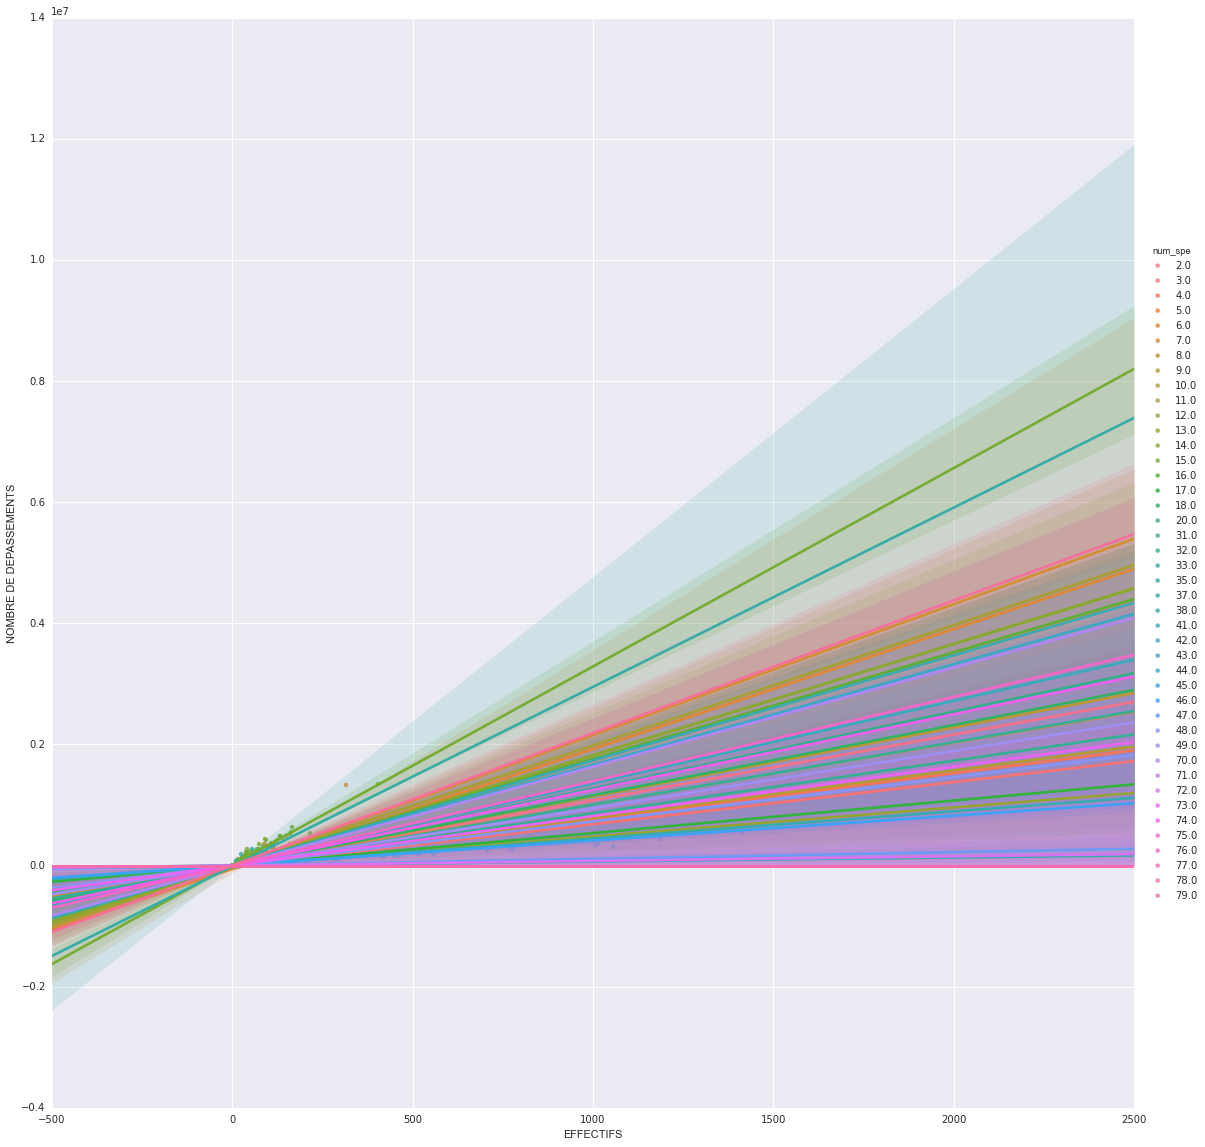

In [12]:
#result = pd.concat([X_variables, y_ozone], axis=1)

import seaborn as sns
sns.lmplot('EFFECTIFS', 'NOMBRE DE DEPASSEMENTS', hue='num_spe', size=16, ci=99, data=data)

In [15]:
dep_groups.head(5)

,EFFECTIFS,DEPASSEMENTS (euros),HONORAIRES TOTAUX (euros),NOMBRE DE DEPASSEMENTS,DEPASSEMENT MOYEN (euros)
num_spe,,,,,
2,44.842105,2801398.671053,14521541.236842,40692.144737,41.078947
3,53.464286,546136.595238,12888899.880952,23775.214286,11.535714
4,25.125000,2126233.645833,6399483.583333,24267.166667,69.375000
5,45.353846,1447987.338462,6924344.492308,71185.076923,14.061538
6,59.269663,1576574.067416,28457206.943820,59684.977528,11.853933


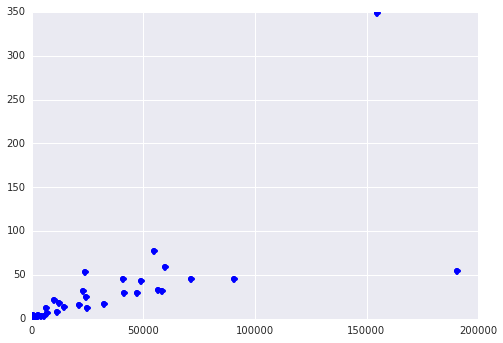

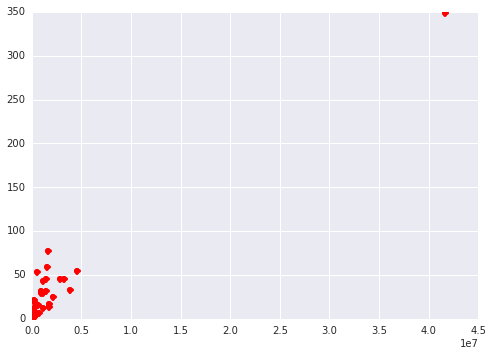

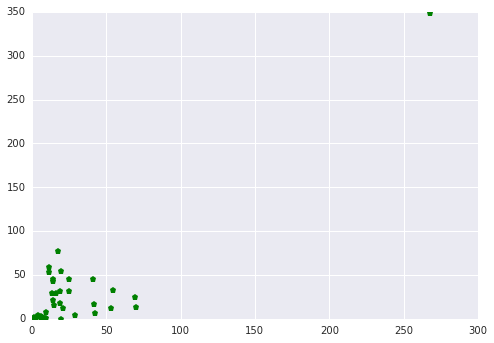

In [14]:
plt.plot(dep_groups[['NOMBRE DE DEPASSEMENTS']],dep_groups[['EFFECTIFS']],'bo')
plt.show()
plt.plot(dep_groups[['DEPASSEMENTS (euros)']],dep_groups[['EFFECTIFS']],'ro')
plt.show()
plt.plot(dep_groups[['DEPASSEMENT MOYEN (euros)']],dep_groups[['EFFECTIFS']],'gp')
plt.show()

In [16]:
dep_groups[['EFFECTIFS']].describe()

,EFFECTIFS
count,43.000000
mean,25.576636
std,54.327500
min,0.000000
25%,0.791176
50%,12.000000
75%,31.629944
max,348.300000


In [111]:
some_effectifs_depassements = dep_groups[['EFFECTIFS', 'DEPASSEMENT MOYEN (euros)']]
print np.asarray(some_effectifs_depassements[['EFFECTIFS']]).shape
some_effectifs_depassements = some_effectifs_depassements.loc[
                              some_effectifs_depassements.EFFECTIFS > np.mean(some_effectifs_depassements.EFFECTIFS)]
#some_effectifs = some_effectifs.dropna()
#some_effectifs.head(5)
#some_effectifs.describe()

(43L, 1L)


Je reprends les spécialités juste pour pouvoir essayer de representer leurs concentration

In [112]:
print df['SPECIALISTES'].str.split('-').apply(lambda x: x[1]).drop_duplicates()[some_effectifs_depassements.index]

num_spe
2                                   Anesthésie
3                            Pathologie cardio
5                                      Dermato
6         Radiodiagnostic et imagerie médicale
7                      Gynécologie obstétrique
8                                       Gastro
11                                         Oto
12                                   Pédiatrie
14                                Rhumatologie
15                               Ophtalmologie
33                                 Psychiatrie
38                        Médecins biologistes
41     Chirurgie orthopédique et traumatologie
70                        Gynécologie médicale
dtype: object


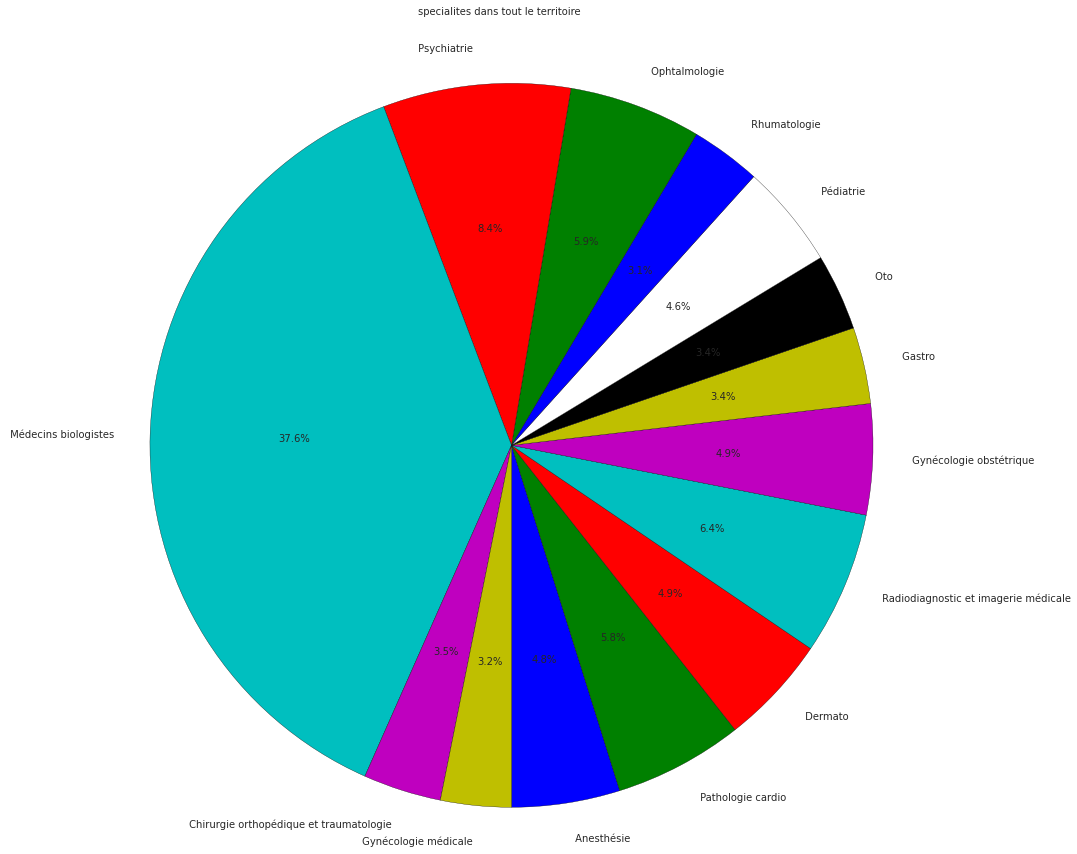

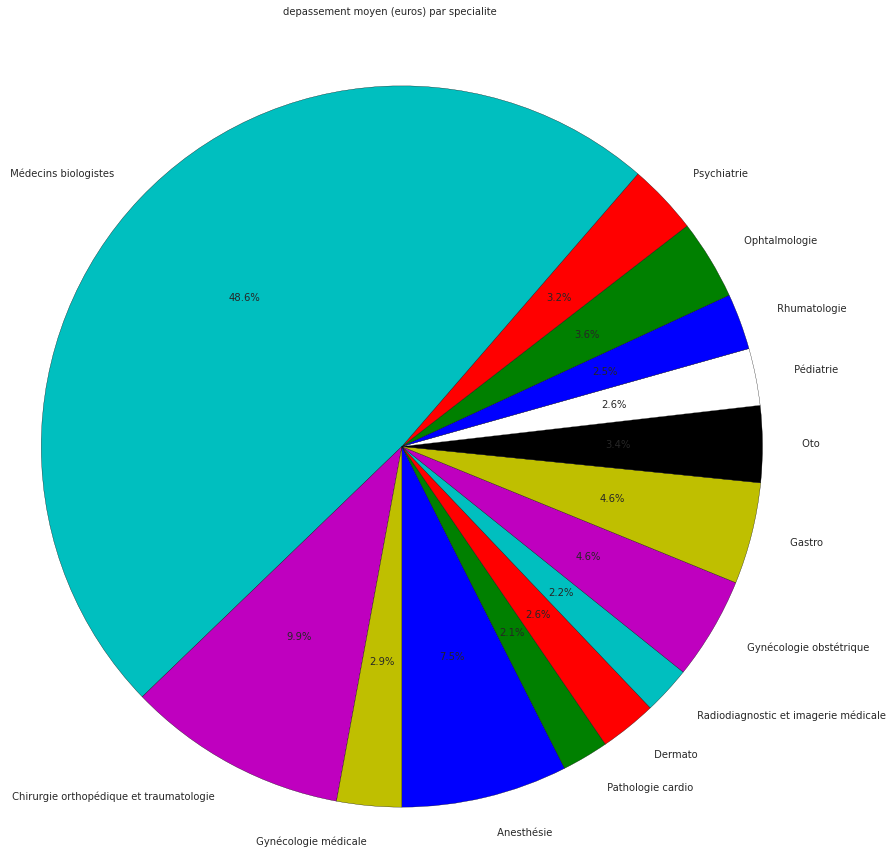

In [114]:
#graphic pie

# --- get some data
data = np.array([5,3,4,6])
labels = df['SPECIALISTES'].str.split('-').apply(lambda x: x[1]).drop_duplicates()[some_effectifs_depassements.index]
explode = (0, 0.1, 0, 0) # explode cats
#colrs=['khaki', 'goldenrod', 'tan', 'wheat']

# --- the plot
fig, ax = plt.subplots(figsize=(13, 13))
ax.pie(some_effectifs_depassements.EFFECTIFS, 
        labels=labels, autopct='%1.1f%%',
        startangle=270)

ax.axis('equal') # keep it a circle
# --- tidy-up and save
fig.suptitle("specialites dans tout le territoire")

# --- the plot
fig, ax = plt.subplots(figsize=(13, 13))
ax.pie(some_effectifs_depassements[['DEPASSEMENT MOYEN (euros)']], 
        labels=labels, autopct='%1.1f%%',
        startangle=270)

ax.axis('equal') # keep it a circle
# --- tidy-up and save
fig.suptitle("depassement moyen (euros) par specialite")

Ces deux graphes montrent que malgré le fait que, sur le plan national, les médecins biologistes sont les plus présents, c'est quand meme eux qui representent le depassement d'honoraire moyen le plus élevé (a peu près autant que tous els autres dépassements moyens)...

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[[  41.07894737]
 [  11.53571429]
 [  14.06153846]
 [  11.85393258]
 [  25.30666667]
 [  25.11864407]
 [  18.9047619 ]
 [  14.0862069 ]
 [  13.88235294]
 [  19.75294118]
 [  17.43421053]
 [ 267.74      ]
 [  54.50769231]
 [  16.        ]]


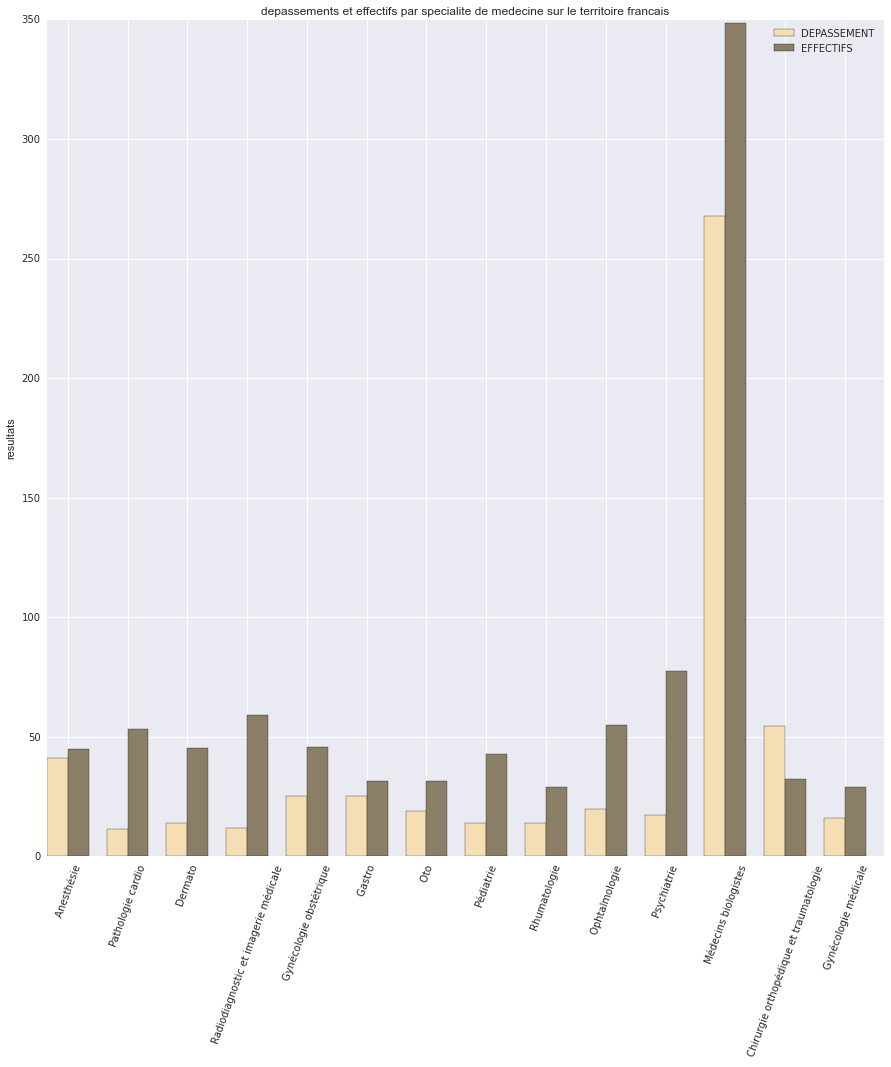

In [144]:
#side by side charts

# --- get the data
DEPASSEMENT = some_effectifs_depassements[['DEPASSEMENT MOYEN (euros)']]
EFFECTIFS = some_effectifs_depassements.EFFECTIFS
labels= np.asarray(df['SPECIALISTES'].str.split('-').apply(lambda x: x[1]).drop_duplicates()[some_effectifs_depassements.index])
# --- the plot – left then right




import numpy as np
import matplotlib.pyplot as plt

N = len(DEPASSEMENT)
menMeans = (20, 35, 30, 35, 27)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

print ind
print np.asarray(DEPASSEMENT)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, np.asarray(DEPASSEMENT), width, color='wheat')

womenMeans = (25, 32, 34, 20, 25)
rects2 = ax.bar(ind+width, np.asarray(EFFECTIFS), width, color='#8B7E66')

# add some
ax.set_ylabel('resultats')
ax.set_title('depassements et effectifs par specialite de medecine sur le territoire francais')
ax.set_xticks(ind+width)
ax.set_xticklabels( labels, rotation=70)

ax.legend( (rects1[0], rects2[0]), ('DEPASSEMENT', 'EFFECTIFS') )

plt.show()